# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')
print(heroes_df.head())
print(powers_df.head())

   Unnamed: 0         name Gender Eye color               Race Hair color  \
0           0       A-Bomb   Male    yellow              Human    No Hair   
1           1   Abe Sapien   Male      blue      Icthyo Sapien    No Hair   
2           2     Abin Sur   Male      blue            Ungaran    No Hair   
3           3  Abomination   Male     green  Human / Radiation    No Hair   
4           4      Abraxas   Male      blue      Cosmic Entity      Black   

   Height          Publisher Skin color Alignment  Weight  
0   203.0      Marvel Comics          -      good   441.0  
1   191.0  Dark Horse Comics       blue      good    65.0  
2   185.0          DC Comics        red      good    90.0  
3   203.0      Marvel Comics          -       bad   441.0  
4   -99.0      Marvel Comics          -       bad   -99.0  
    hero_names  Agility  Accelerated Healing  Lantern Power Ring  \
0      3-D Man     True                False               False   
1       A-Bomb    False                 T

It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
heroes_df = heroes_df.drop('Unnamed: 0',axis=1)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [4]:
print(heroes_df.columns)
print(powers_df.columns)
powers_df.head()
print(heroes_df.isna().sum())
print(heroes_df.describe())
#Notice that Height and Weioght categories bot have big chunks (more than a quarter) of
#negative values!
print(heroes_df['Race'].unique())
print("'-' in Race column: " +str(heroes_df['Race'][heroes_df['Race']=='-'].count()))

#Notice that lack of info is encoded as '-' in the race columns (nearly half the column)
#probably true in other columns as well
print("'-' in Hair color column: " +str(heroes_df['Hair color'][heroes_df['Hair color']=='-'].count()))
print("'-' in Alignment column: " +str(heroes_df['Alignment'][heroes_df['Alignment']=='-'].count()))

Index(['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')
Index(['hero_names', 'Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy Absorption', 'Flight',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=168)
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64
           Height      Weight
count  734.000000  732.000000
mean   102.254087   43.855191
std    139.624543  130.823733
min    -99.000000  -99.000000
25%    -99.000000  -99.000000
50%    175.000000   62.000000
75%    185.000000   90.0000

## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




                name  Gender Eye color           Race Hair color  Height  \
4            Abraxas    Male      blue  Cosmic Entity      Black   -99.0   
6        Adam Monroe    Male      blue              -      Blond   -99.0   
14       Alex Mercer    Male         -          Human          -   -99.0   
15      Alex Woolsly    Male         -              -          -   -99.0   
18  Allan Quatermain    Male         -              -          -   -99.0   
21    Ando Masahashi    Male         -              -          -   -99.0   
23             Angel    Male         -        Vampire          -   -99.0   
26            Angela  Female         -              -          -   -99.0   
32        Anti-Spawn    Male         -              -          -   -99.0   
35          Aquababy    Male      blue              -      Blond   -99.0   

            Publisher Skin color Alignment  Weight  
4       Marvel Comics          -       bad   -99.0  
6        NBC - Heroes          -      good   -99.0  
14  

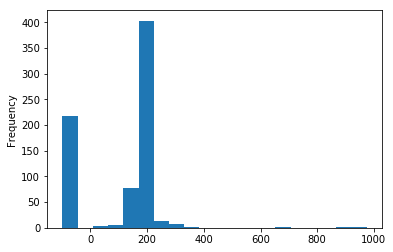

In [5]:
#Let's start by investigating the height/weight columns with the negative values
heroes_df['Height'].plot(kind='hist', bins=20)
#There is definitely a class of herroes given the nonsense negative height
#notice the gap between them and the rest of the population
#let's split them off into their own group and see if we can see what is going on
heroes_neg = heroes_df[heroes_df['Height']==-99]
print(heroes_neg.head(10))
#I notice that the heroes who have negative height also seem to be the ones with negative weight
#let's check if that's true across the board
print("Heroes with negative height: " + str(heroes_neg['Weight'].count()))
print("Heroes who also have negative weight: " + 
      str(heroes_neg['Weight'][heroes_neg['Weight']==-99].count()))
# All but five of the onews with negative height also have negative weight
print("Total number of heroes with negative weight: "+
     str(heroes_df['Weight'][heroes_df['Weight']==-99].count()))
#and there are another twenty or so with negative weight who have positive height values
#Almost a third of entries have no proper height/weight
#Among superheroes, these values can vary a lot... I am loathe to put in placeholder values like median or mean
#I think the only thing might be to drop the two columns altogether!

In [6]:
#I noticed that the race column also doesn't look terribly useful:
print(heroes_df.groupby('Race')['name'].nunique())
#In addition to having a large proportion of blanks, I don't think these categories are terribly informative
#Many of the categories have only one or two entries, many are sort of useless
#(Yoda appears to be a 'Yoda's species')
print(heroes_df[heroes_df['Race']=='-'].head())
#Looking at the head, suspicion is that most of these cases are either 'human' or 'mutant' from the x-men
#I also notice that all the characters from the NBC show heroes are missing, they're all human, right?
print(heroes_df.loc[(heroes_df['Race']=='-')&(heroes_df['Publisher']=='NBC - Heroes')].head())
#I'm going to fill in human for them
heroes_df['Race'] = list(map(lambda x,y: 'Human' if x =='NBC - Heroes' 
                             else y, heroes_df['Publisher'],heroes_df['Race']))
heroes_df.loc[heroes_df['Publisher']=='NBC - Heroes'].head()

Race
-                     301
Alien                   7
Alpha                   5
Amazon                  2
Android                 9
Animal                  4
Asgardian               5
Atlantean               5
Bizarro                 1
Bolovaxian              1
Clone                   1
Cosmic Entity           4
Cyborg                 11
Czarnian                1
Dathomirian Zabrak      1
Demi-God                2
Demon                   6
Eternal                 2
Flora Colossus          1
Frost Giant             2
God / Eternal          14
Gorilla                 1
Gungan                  1
Human                 203
Human / Altered         3
Human / Clone           1
Human / Cosmic          2
Human / Radiation      11
Human-Kree              2
Human-Spartoi           1
                     ... 
Icthyo Sapien           1
Inhuman                 4
Kaiju                   1
Kakarantharaian         1
Korugaran               1
Kryptonian              7
Luphomoid               1
Maiar  

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
6,Adam Monroe,Male,blue,Human,Blond,-99.0,NBC - Heroes,-,good,-99.0
15,Alex Woolsly,Male,-,Human,-,-99.0,NBC - Heroes,-,good,-99.0
21,Ando Masahashi,Male,-,Human,-,-99.0,NBC - Heroes,-,good,-99.0
177,Claire Bennet,Female,blue,Human,Blond,-99.0,NBC - Heroes,-,good,-99.0
219,DL Hawkins,Male,-,Human,-,-99.0,NBC - Heroes,-,good,-99.0


In [7]:
#Looking at what remains, I think that what has happened is that defaults aren't being loaded
#A few DC heroes that are human are here, as with Marvel heroes who are mutants. Probably
#whatever database this was scraped from simply didn't put in these default values and only made a note
#when a character was something out of the ordinary
heroes_df[(heroes_df['Race']=='-')&(heroes_df['Publisher'] == 'DC Comics')].head(20)
#I see that there are some counter examples, but I think that it's probably true more often than not that
#the DC ones here are human

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
13,Alan Scott,Male,blue,-,Blond,180.0,DC Comics,-,good,90.0
35,Aquababy,Male,blue,-,Blond,-99.0,DC Comics,-,good,-99.0
49,Atom,Male,blue,-,Red,178.0,DC Comics,-,good,68.0
50,Atom,Male,-,-,-,-99.0,DC Comics,-,good,-99.0
51,Atom Girl,Female,black,-,Black,168.0,DC Comics,-,good,54.0
53,Atom III,Male,-,-,Red,-99.0,DC Comics,-,good,-99.0
54,Atom IV,Male,brown,-,Black,-99.0,DC Comics,-,good,72.0
58,Aztar,Male,-,-,-,-99.0,DC Comics,-,good,-99.0
62,Batgirl,Female,-,-,-,-99.0,DC Comics,-,good,-99.0
64,Batgirl III,Female,-,-,-,-99.0,DC Comics,-,good,-99.0


In [8]:
#Quick look at the other set
powers_df.isna().sum().sort_values()
#There appear to be no missing values!

hero_names                      0
Enhanced Smell                  0
Illusions                       0
Thirstokinesis                  0
Hair Manipulation               0
Illumination                    0
Omnipotent                      0
Cloaking                        0
Changing Armor                  0
Power Cosmic                    0
Biokinesis                      0
Water Control                   0
Radiation Immunity              0
Vision - Telescopic             0
Toxin and Disease Resistance    0
Spatial Awareness               0
Energy Resistance               0
Telepathy Resistance            0
Time Travel                     0
Molecular Combustion            0
Natural Weapons                 0
Energy Manipulation             0
Natural Armor                   0
Intangibility                   0
Enhanced Sight                  0
Molecular Manipulation          0
Heat Generation                 0
Adaptation                      0
Gliding                         0
Power Suit    

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [9]:
#Let's join the powers frame to the heroes one, using the heroes name as the index
df_comb = heroes_df
df_comb.set_index('name', inplace=True)
powers_df.rename(columns={'hero_names':'name'},inplace=True)
powers_df.set_index('name',inplace=True)

In [10]:
df_comb = df_comb.join(powers_df,how='inner')
df_comb.head()


,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,False,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0
Agent Zero,Male,-,-,-,191.0,Marvel Comics,-,good,104.0
Air-Walker,Male,blue,-,White,188.0,Marvel Comics,-,bad,108.0


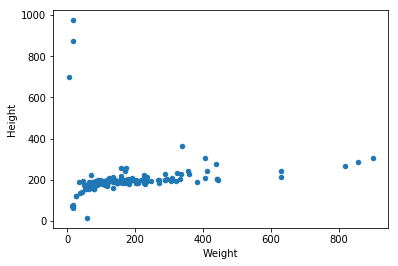

In [11]:
heroes_male = heroes_df[heroes_df['Gender']=='Male']
heroes_female = heroes_df[heroes_df['Gender']=='Female']
#Now I'm going to drop the -99s
heroes_male = heroes_male.drop(heroes_male[(heroes_male['Height']==-99)|(heroes_male['Weight']==-99)].index)
heroes_female = heroes_female.drop(heroes_female[(heroes_female['Height']==-99)|
                                                 (heroes_female['Weight']==-99)].index)
heroes_male.plot.scatter('Weight','Height')
heroes_male.head(10)

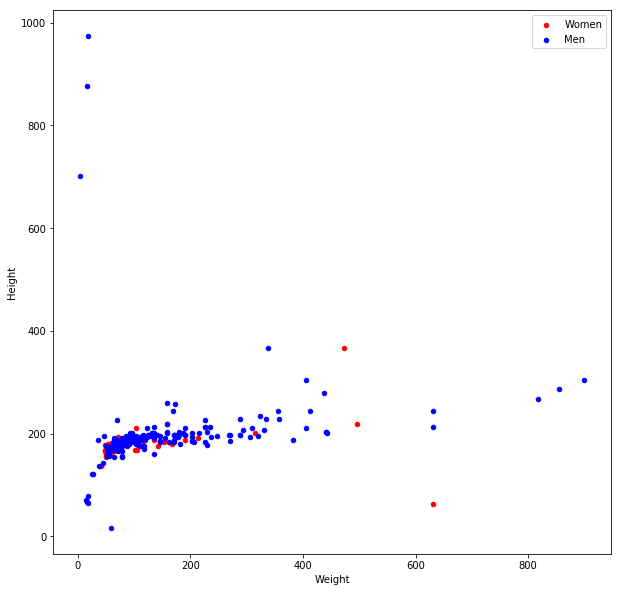

In [12]:

ax = heroes_female.plot.scatter('Weight','Height',c='red', label='Women',figsize = (10,10))
heroes_male.plot.scatter('Weight','Height', c='blue', label='Men', ax=ax)


## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [36]:


def show_distplot(dataframe, gender, column_name):
    sns.distplot(list(dataframe[dataframe['Gender']==gender][column_name]))

In [56]:
df2 = heroes_df
df2 = df2.drop(df2[df2['Height']==-99].index)
df2 = df2.drop(df2[df2['Weight']==-99].index)
df2 = df2.drop(df2[df2['Weight'].isna()].index)


/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


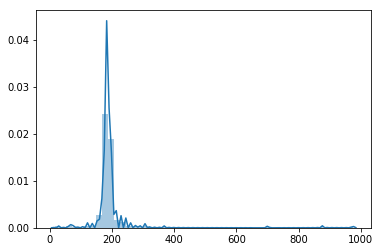

In [43]:
show_distplot(df2,'Male','Height')

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


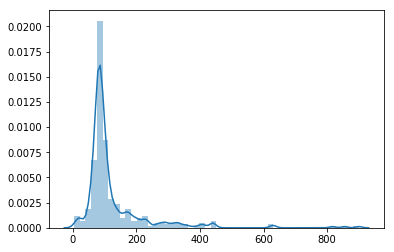

In [55]:
show_distplot(df2,'Male','Weight')

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


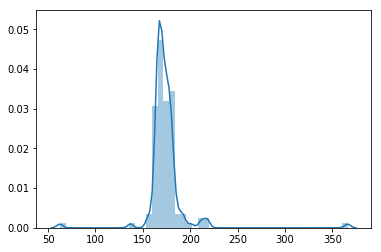

In [45]:
show_distplot(df2,'Female','Height')

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


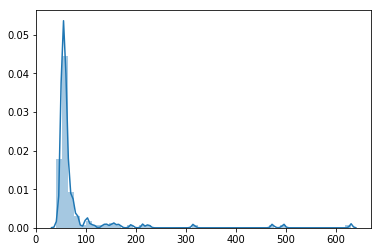

In [46]:
show_distplot(df2,'Female','Weight')


Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

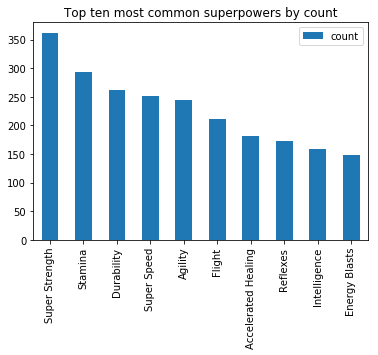

In [86]:
# most common powers overall
#list(df_comb.columns)[9:]
#df_comb['Agility'].sum()
power_rank = pd.DataFrame(list(map(lambda x: df_comb[x].sum(),list(df_comb.columns)[9:])),
                          list(df_comb.columns)[9:],columns = ['count'])

power_rank.sort_values(by ='count', ascending=False).head(10).plot(kind='bar',
                                                                   title="Top ten most common superpowers by count")

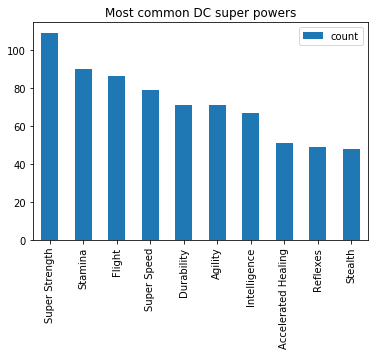

In [100]:
power_rank_DC = pd.DataFrame(list(map(lambda x: df_comb[df_comb['Publisher']=='DC Comics'][x].sum(),
                                      list(df_comb.columns)[9:])),list(df_comb.columns)[9:],columns = ['count'])
power_rank_DC.sort_values(by='count',ascending=False).head(10).plot(kind='bar',
                                                                    title="Most common DC super powers")


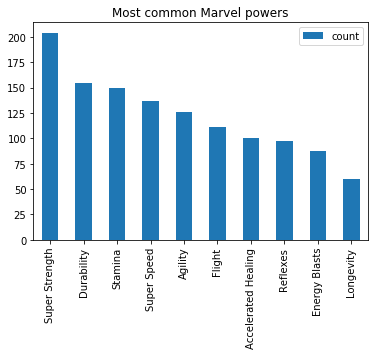

In [103]:
power_rank_Mar = pd.DataFrame(list(map(lambda x: df_comb[df_comb['Publisher']=='Marvel Comics'][x].sum(),
                                      list(df_comb.columns)[9:])),list(df_comb.columns)[9:],columns = ['count'])
power_rank_Mar.sort_values(by='count', ascending=False).head(10).plot(kind='bar',title="Most common Marvel powers")

In [146]:
DC_top10 = list(power_rank_DC.sort_values(by='count',ascending=False).index)[0:10]
Marvel_top10 = list(power_rank_Mar.sort_values(by='count',ascending=False).index)[0:10]
#DC_unique = list(map(lambda x: x if x not in Marvel_top10, DC_top10))
DC_unique = []
for x in DC_top10:
    if x not in Marvel_top10:
        DC_unique.append(x)
print(DC_unique)

Marvel_unique = []
for x in Marvel_top10:
    if x not in DC_top10:
        Marvel_unique.append(x)
print(Marvel_unique)
print("The most used powers are largely the same. \n"
     +"The only top 10 Marvel power not in the DC set are "+Marvel_unique[0]+" and " +Marvel_unique[1])


['Intelligence', 'Stealth']
['Energy Blasts', 'Longevity']
The most used powers are largely the same. 
The only top 10 Marvel power not in the DC set are Energy Blasts and Longevity


Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [176]:
#The co-occuring powers sounds like an interesting question. Superman is strong and can fly,
#are strong heroes more likely to have flight?
# This might be easily answered simply with a correlation table, but it's giving me some negative values?
#That's curious, shouldn't get that, maybe it has something to do with whether you start with more Falses than
#Trues? Will re do myself
co_occur = pd.DataFrame(data=None, index=list(df_comb.columns)[9:],columns=list(df_comb.columns)[9:])
co_occur.head()
for x in list(df_comb.columns)[9:]:
    co_occur[x] = list(map(lambda y: df_comb[df_comb[x]==True].sum()[y]/
                           df_comb[x].sum(),list(df_comb.columns)[9:]))
co_occur.head()






,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Agility,1.000000,0.585635,0.454545,0.44,0.551020,0.454198,0.750000,0.428571,0.358491,0.882353,...,0.8125,0.642857,1.0,0.8,1.0,1.0,0.0,1.0,0.5,0.5
Accelerated Healing,0.434426,1.000000,0.181818,0.56,0.510204,0.412214,0.356061,0.467532,0.358491,0.764706,...,0.9375,0.714286,1.0,0.9,1.0,0.0,1.0,1.0,1.0,1.0
Lantern Power Ring,0.020492,0.011050,1.000000,0.00,0.000000,0.015267,0.000000,0.000000,0.042453,0.000000,...,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dimensional Awareness,0.045082,0.077348,0.000000,1.00,0.000000,0.026718,0.053030,0.103896,0.075472,0.058824,...,0.0625,0.785714,0.0,0.1,0.0,0.0,0.0,0.0,1.0,1.0
Cold Resistance,0.110656,0.138122,0.000000,0.00,1.000000,0.160305,0.098485,0.116883,0.061321,0.088235,...,0.0000,0.071429,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0


In [185]:
#Some of high values here come from there being only one or two people with a certain ability e.g. 'Odin Force'
df_comb[df_comb['Odin Force']==True]
#I'm going to drop any power with less than, say, 10 heroes

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
Odin,Male,blue,God / Eternal,White,206.0,Marvel Comics,-,good,293.0,True,...,False,False,True,False,False,False,False,False,False,False
Thor,Male,blue,Asgardian,Blond,198.0,Marvel Comics,-,good,288.0,True,...,False,False,True,False,False,False,False,False,False,False


In [200]:
rare_powers = []
for x in list(df_comb.columns)[9:]:
    if df_comb[x].sum() < 10:
        rare_powers.append(x)
co_occur2 = co_occur
co_occur2 = co_occur2.drop(rare_powers)
co_occur2 = co_occur2.drop(rare_powers, axis=1)
#And here I knocked out the 1-1 correlation between a power and itself
for x in co_occur2.index:
    co_occur2[x][x]=0
co_occur2.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Vision - Night,Vision - Infrared,Matter Absorption,Resurrection,Vision - Heat,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Symbiote Costume
Agility,0.000000,0.585635,0.454545,0.44,0.551020,0.454198,0.750000,0.428571,0.358491,0.882353,...,0.736842,0.666667,0.6,0.500000,0.578947,0.48,0.60,0.8125,0.642857,0.8
Accelerated Healing,0.434426,0.000000,0.181818,0.56,0.510204,0.412214,0.356061,0.467532,0.358491,0.764706,...,0.552632,0.583333,0.8,0.500000,0.631579,0.56,0.60,0.9375,0.714286,0.9
Lantern Power Ring,0.020492,0.011050,0.000000,0.00,0.000000,0.015267,0.000000,0.000000,0.042453,0.000000,...,0.026316,0.000000,0.0,0.000000,0.052632,0.04,0.04,0.0000,0.000000,0.0
Dimensional Awareness,0.045082,0.077348,0.000000,0.00,0.000000,0.026718,0.053030,0.103896,0.075472,0.058824,...,0.000000,0.000000,0.2,0.214286,0.052632,0.04,0.00,0.0625,0.785714,0.1
Cold Resistance,0.110656,0.138122,0.000000,0.00,0.000000,0.160305,0.098485,0.116883,0.061321,0.088235,...,0.315789,0.291667,0.2,0.142857,0.157895,0.08,0.32,0.0000,0.071429,0.1


In [203]:
co_occur3 = co_occur2.stack()
co_occur3.sort_values(ascending =False).head(10)

Super Strength  Vision - X-Ray          1.000000
Stamina         Web Creation            1.000000
Super Strength  Symbiote Costume        1.000000
Flight          Vision - X-Ray          1.000000
Super Strength  Vision - Thermal        1.000000
                Matter Absorption       1.000000
                Vision - Infrared       0.958333
                Invulnerability         0.948276
                Vision - Microscopic    0.947368
                Vision - Heat           0.947368
dtype: float64

In [205]:
#Here's Our Answer! Everyone who has X-Ray Vision has super strength and flight!
#Every one who has web creation has stamina
df_comb[df_comb['Vision - X-Ray']==True]['Super Strength']

name
Amazo                True
Bizarro              True
Booster Gold         True
Cyborg Superman      True
Faora                True
Firestorm            True
Firestorm            True
General Zod          True
Hyperion             True
Jack-Jack            True
Krypto               True
Martian Manhunter    True
Match                True
Miss Martian         True
Nova                 True
Nova                 True
Onslaught            True
Power Girl           True
Superboy             True
Superboy-Prime       True
Supergirl            True
Superman             True
Ultron               True
Wildfire             True
Wonder Woman         True
Name: Super Strength, dtype: bool

In [13]:
df_comb[df_comb['Vision - X-Ray']==True]['Super Strength']

name
Amazo                True
Bizarro              True
Booster Gold         True
Cyborg Superman      True
Faora                True
Firestorm            True
Firestorm            True
General Zod          True
Hyperion             True
Jack-Jack            True
Krypto               True
Martian Manhunter    True
Match                True
Miss Martian         True
Nova                 True
Nova                 True
Onslaught            True
Power Girl           True
Superboy             True
Superboy-Prime       True
Supergirl            True
Superman             True
Ultron               True
Wildfire             True
Wonder Woman         True
Name: Super Strength, dtype: bool

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data